<b> I was not pleased with the -3.4 R^2 for the model of my data so I cam going to try cross validation and get a better idea of what model to use </b>

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

In [4]:
All_Data = pd.read_csv('Combined_Carbon_AGAGE_test.csv')
        

In [5]:
All_Data.head()

,Unnamed: 0,Unnamed: 0.1,YYYY,MM,extent,CFC11,CFC12,CFC113,CH3CCl3,CCl4,N20,CH4,Year_x,Month_x,El_Nino,La_Nina,Decimal Date,C02,Year_y,Month_y
0,0,1986-05-01,1986,5,13.38,217.458,406.133,43.903,110.543,99.982,304.778,1659.207,1986,5,1,0,1986.375,347.26,1986,5
1,1,1986-06-01,1986,6,11.98,219.094,410.075,44.562,111.337,100.247,305.527,1652.992,1986,6,1,0,1986.458,347.52,1986,6
2,2,1986-07-01,1986,7,10.15,219.371,410.970,44.670,110.982,100.440,305.535,1650.822,1986,7,1,0,1986.542,347.33,1986,7
3,3,1986-08-01,1986,8,7.98,220.151,412.585,45.120,109.395,100.238,305.560,1648.518,1986,8,1,0,1986.625,347.41,1986,8
4,4,1986-09-01,1986,9,7.41,222.471,417.228,45.792,110.315,100.562,305.845,1668.842,1986,9,1,0,1986.708,348.35,1986,9


In [73]:
B = All_Data['N20']

In [141]:
X = All_Data.loc[:,['N20','C02','CH4']]

y = All_Data['extent']

In [142]:
# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)


In [143]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [144]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [145]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.041
Ridge Regression val R^2: 0.037
Degree 2 polynomial regression val R^2: 0.056


<b> Below I will attempt to adjust my features into polynomial terms and rerun the model</b>

In [155]:
def split_and_validate(X2, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_test, y_test)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}')

<b> APPLYING A 2ND DEGREE POLYNOMIAL </B>

In [156]:

X2 = X.copy()

X2['N20_POLY'] = X2['N20'] ** 2
X2['C02_POLY'] = X2['C02'] ** 2
X2['CH4_POLY'] = X2['CH4'] ** 2

split_and_validate(X2, y)


Validation R^2 score was: 0.04268305117753379
Feature coefficient results: 

N20 : 0.14
C02 : -0.11
CH4 : 0.01


<b> APPLYING A 3ND DEGREE POLYNOMIAL </B>

In [160]:
def split_and_validate(X3, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_test, y_test)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}')

In [158]:
X3 = X2.copy()

X3['N20_POLY3'] = X2['N20'] ** 3
X3['C02_POLY3'] = X2['C02'] ** 3



In [161]:
split_and_validate(X3, y)


Validation R^2 score was: 0.04268305117753379
Feature coefficient results: 

N20 : 0.14
C02 : -0.11
CH4 : 0.01


<b> There is no difference between the 2 and 3 degree polynomial- I most likely messed up on the process. I'm now going to test interaction between the two features and see how that affects the model </b>

In [151]:
def split_and_validate(X4, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    # val_score = lr_model.score(X_test, y_test)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}')

In [152]:
X4 = X2.copy()

# multiplicative interaction
# X3['N20_x_C02'] = X3['N20'] * X3['C02']

# division interaction
X3['N20/C02'] = X3['N20'] / X3['C02']



In [153]:
split_and_validate(X4, y)


Validation R^2 score was: 0.04268305117753379
Feature coefficient results: 

N20 : 0.14
C02 : -0.11
CH4 : 0.01


In [ ]:
X_test, y_test

In [164]:

    
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_test, y_test)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}')


Validation R^2 score was: 0.04268305117753379
Feature coefficient results: 

N20 : 0.14
C02 : -0.11
CH4 : 0.01


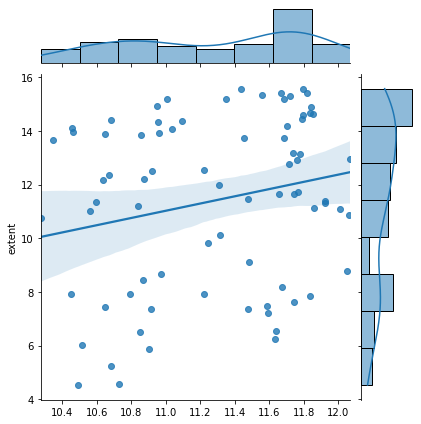

In [166]:
preds = lr_model.predict(X_test)
residuals = y_test - preds
sns.jointplot(x=preds,y=y_test, kind='reg')

<B> A THIRD PARTY SCRIPT ATTEMPTING TO CREATE A POLYNOMIAL MODEL FOR MY DATA</b>

In [41]:
lm.fit(X,y)
print(f'Degree 2 polynomial regression val R^2: {lm.score(X_test, y_test):.3f}')

Degree 2 polynomial regression val R^2: 0.033


In [91]:
mymodel = numpy.poly1d(numpy.polyfit(B, y, 4))

In [92]:
mymodel

poly1d([ 2.89015927e-05, -3.64299409e-02,  1.72140296e+01, -3.61400525e+03,
        2.84457309e+05])

In [93]:
myline = numpy.linspace(1, 381, 381)

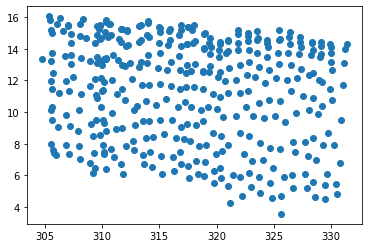

In [94]:
plt.scatter(B, y)

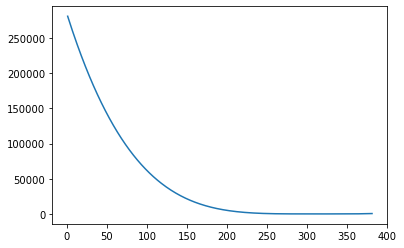

In [95]:
plt.plot(myline, mymodel(myline))

In [96]:
import numpy
from sklearn.metrics import r2_score

In [98]:
mymodel = numpy.poly1d(numpy.polyfit(B, y, 4))

print(r2_score(y, mymodel(B)))

0.025856044777259113


<b> The Cross Validation tells me that 2nd Degree polynomial regression is the best choice. I will now apply a polynomial degree to the N02 column and retrain my model 

In [60]:
import scipy.stats as stats

In [61]:
def diagnostic_plots(y_pred, y_true, resid):
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))

    g1 = sns.regplot(x=y_pred, y=y_true, ci=False, fit_reg=False, line_kws={'color': 'blue'}, ax=axes[0], scatter_kws={'s': 5})
    g1.set_xlabel('Predicted Target')
    g1.set_ylabel('True Target')
    g1.plot(y_true, y_true, '--', color='gray')

    g2 = sns.regplot(x=y_pred, y=resid, lowess=True, ax=axes[1], line_kws={'color': 'red'}, scatter_kws={'s': 5})
    g2.set_xlabel('Predicted Target')
    g2.set_ylabel('Residual')
    g2.axhline(y=0, color='gray', linestyle='--')

    stats.probplot(resid, dist="norm", plot=axes[2])

    fig.suptitle('Diagnostic Plots');
    fig.tight_layout();

In [62]:
diagnostic_plots(fit.fittedvalues, y, fit.resid)

NameError: name 'fit' is not defined